In [1]:
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import EarlyStopping  
import glob as gb 
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

2024-05-17 23:42:30.727194: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-17 23:42:31.821864: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
IMG_SIZE = 224
SEED = 1000
BATCH_SIZE = 16
TRAIN_DIR = '/mnt/g/food-101.zip/Training_data'
TEST_DIR = '/mnt/g/food-101.zip/Test_data'

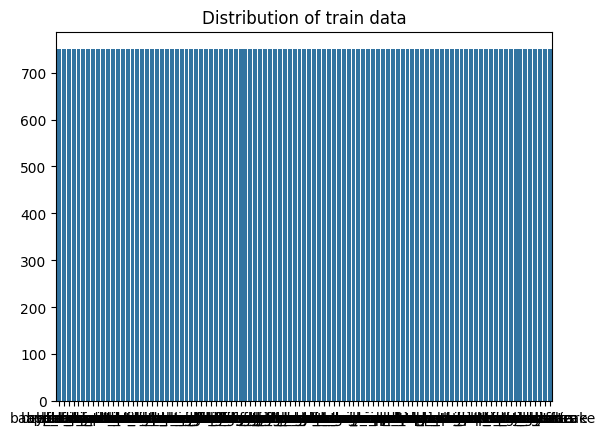

75750


In [3]:
categories = []
class_count=[]
train_exm = 0
for f in os.listdir(TRAIN_DIR):
    files = gb.glob(pathname=str(TRAIN_DIR + '/' + f + '/*.jpg'))
    categories.append(f)
    class_count.append(len(files))
    train_exm += len(files)

sns.barplot(x=categories, y=class_count).set_title("Distribution of train data")

plt.show()
print(train_exm)

In [4]:
# def preprocess_input(img):
#     img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE))
#     img = tf.keras.applications.efficientnet.preprocess_input(img)
#     return img

train_gen = ImageDataGenerator(
   rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    shear_range=0.1,
    validation_split=0.2,
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
    #dtype=tf.float32

)

test_gen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
    #dtype=tf.float32
)

In [5]:
train_batch = train_gen.flow_from_directory(
    directory = TRAIN_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    subset = 'training',
    seed=SEED
)

valid_batch = train_gen.flow_from_directory(
    directory = TRAIN_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    subset = 'validation',
    seed=SEED
)

test_batch = test_gen.flow_from_directory(
    directory = TEST_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    seed = SEED
)

Found 60600 images belonging to 101 classes.
Found 15150 images belonging to 101 classes.
Found 25250 images belonging to 101 classes.


In [6]:
img_shape = (IMG_SIZE, IMG_SIZE) +(3,)
base_model = tf.keras.applications.EfficientNetB4(input_shape=img_shape, include_top=False, weights='imagenet')
base_model.summary()


2024-05-17 23:42:41.555659: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-17 23:42:41.784686: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-17 23:42:41.784739: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-17 23:42:41.787409: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-17 23:42:41.787483: I external/local_xla/xla/stream_executor

Model: "efficientnetb4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 224, 224,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │      1,296 │ stem_conv_pad[0]… │
│                     │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        192 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        432 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        192 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 48)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 48)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 12)  │        588 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 48)  │        624 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 48)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │      1,152 │ block1a_se_excit

 Total params: 17,673,823 (67.42 MB)

 Trainable params: 17,548,616 (66.94 MB)

 Non-trainable params: 125,207 (489.09 KB)

In [7]:
inputs = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = base_model(inputs, training=True)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dropout(0.2)(x)  # Corrected dropout without activation
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
output = tf.keras.layers.Dense(101, activation='softmax')(x)
model = tf.keras.Model(inputs, output)
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb4 (Functional)     │ (None, 7, 7, 1792)     │    17,673,823 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1792)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       918,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 101)            │        13,029 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,834,884 (71.85 MB)

 Trainable params: 18,709,677 (71.37 MB)

 Non-trainable params: 125,207 (489.09 KB)

In [8]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
loss=tf.keras.losses.sparse_categorical_crossentropy,
metrics=['accuracy'])  

In [9]:
h = model.fit(train_batch, 
    steps_per_epoch=407,
validation_data=valid_batch,
validation_steps=158,
 epochs=50, 
 callbacks=[tf.keras.callbacks.EarlyStopping(patience=5)],
 verbose=1)

Epoch 1/50


/home/tan/anaconda3/envs/myenv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1715967814.214862    2316 service.cc:145] XLA service 0x7fe940002c30 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1715967814.214901    2316 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2024-05-17 23:43:35.774129: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-17 23:43:40.881148: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8900
I0000 

407/407 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step - accuracy: 0.0095 - loss: 4.6215

I0000 00:00:1715968085.151045    4786 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_3983', 4 bytes spill stores, 4 bytes spill loads



407/407 ━━━━━━━━━━━━━━━━━━━━ 362s 380ms/step - accuracy: 0.0095 - loss: 4.6214 - val_accuracy: 0.0403 - val_loss: 4.5780
Epoch 2/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 139s 342ms/step - accuracy: 0.0297 - loss: 4.5373 - val_accuracy: 0.1297 - val_loss: 4.0418
Epoch 3/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 133s 328ms/step - accuracy: 0.1032 - loss: 4.0767 - val_accuracy: 0.2227 - val_loss: 3.3987
Epoch 4/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 126s 310ms/step - accuracy: 0.1796 - loss: 3.5888 - val_accuracy: 0.3438 - val_loss: 2.8217
Epoch 5/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 119s 293ms/step - accuracy: 0.2479 - loss: 3.1734 - val_accuracy: 0.4110 - val_loss: 2.4851
Epoch 6/50
  2/407 ━━━━━━━━━━━━━━━━━━━━ 54s 136ms/step - accuracy: 0.3750 - loss: 2.7077 

I0000 00:00:1715968747.034357    2320 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_1', 44 bytes spill stores, 44 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_3', 172 bytes spill stores, 172 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_4', 44 bytes spill stores, 44 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_6', 44 bytes spill stores, 44 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_7', 36 bytes spill stores, 36 bytes spill loads



407/407 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step - accuracy: 0.3037 - loss: 2.9626

I0000 00:00:1715968856.458115   10376 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_3976', 8 bytes spill stores, 8 bytes spill loads



407/407 ━━━━━━━━━━━━━━━━━━━━ 217s 535ms/step - accuracy: 0.3037 - loss: 2.9624 - val_accuracy: 0.4498 - val_loss: 2.2704
Epoch 7/50
  1/407 ━━━━━━━━━━━━━━━━━━━━ 48s 120ms/step - accuracy: 0.3750 - loss: 2.2413

2024-05-18 00:01:03.162967: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-18 00:01:03.163232: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
/home/tan/anaconda3/envs/myenv/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


407/407 ━━━━━━━━━━━━━━━━━━━━ 107s 262ms/step - accuracy: 0.3465 - loss: 2.7487 - val_accuracy: 0.4992 - val_loss: 2.0844
Epoch 8/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 90s 221ms/step - accuracy: 0.3748 - loss: 2.5735 - val_accuracy: 0.5415 - val_loss: 1.8860
Epoch 9/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 84s 206ms/step - accuracy: 0.4248 - loss: 2.3623 - val_accuracy: 0.5494 - val_loss: 1.8424
Epoch 10/50
125/407 ━━━━━━━━━━━━━━━━━━━━ 18s 67ms/step - accuracy: 0.4439 - loss: 2.3223

2024-05-18 00:05:51.608171: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-18 00:05:51.609607: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


407/407 ━━━━━━━━━━━━━━━━━━━━ 37s 91ms/step - accuracy: 0.4478 - loss: 2.2920 - val_accuracy: 0.5621 - val_loss: 1.7692
Epoch 11/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 111s 270ms/step - accuracy: 0.4623 - loss: 2.2244 - val_accuracy: 0.5997 - val_loss: 1.6773
Epoch 12/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 108s 266ms/step - accuracy: 0.4725 - loss: 2.1967 - val_accuracy: 0.6092 - val_loss: 1.6415
Epoch 13/50
  1/407 ━━━━━━━━━━━━━━━━━━━━ 58s 145ms/step - accuracy: 0.4375 - loss: 2.1365

2024-05-18 00:09:59.967962: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-18 00:09:59.968438: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


407/407 ━━━━━━━━━━━━━━━━━━━━ 114s 280ms/step - accuracy: 0.5053 - loss: 2.0415 - val_accuracy: 0.6088 - val_loss: 1.6728
Epoch 14/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 112s 277ms/step - accuracy: 0.5056 - loss: 2.0101 - val_accuracy: 0.6151 - val_loss: 1.5893
Epoch 15/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 109s 269ms/step - accuracy: 0.5254 - loss: 1.9797 - val_accuracy: 0.6444 - val_loss: 1.4724
Epoch 16/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 105s 258ms/step - accuracy: 0.5409 - loss: 1.8978 - val_accuracy: 0.6301 - val_loss: 1.5070
Epoch 17/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 97s 238ms/step - accuracy: 0.5642 - loss: 1.8004 - val_accuracy: 0.6424 - val_loss: 1.5473
Epoch 18/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 80s 196ms/step - accuracy: 0.5703 - loss: 1.7915 - val_accuracy: 0.6506 - val_loss: 1.4694
Epoch 19/50
  1/407 ━━━━━━━━━━━━━━━━━━━━ 57s 141ms/step - accuracy: 0.7500 - loss: 1.1344

2024-05-18 00:20:16.711282: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-18 00:20:16.711461: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


407/407 ━━━━━━━━━━━━━━━━━━━━ 88s 216ms/step - accuracy: 0.5793 - loss: 1.7112 - val_accuracy: 0.6622 - val_loss: 1.4554
Epoch 20/50
125/407 ━━━━━━━━━━━━━━━━━━━━ 20s 73ms/step - accuracy: 0.6223 - loss: 1.5999

2024-05-18 00:21:53.570148: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-18 00:21:53.571491: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


407/407 ━━━━━━━━━━━━━━━━━━━━ 39s 95ms/step - accuracy: 0.6103 - loss: 1.6181 - val_accuracy: 0.6539 - val_loss: 1.4722
Epoch 21/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 109s 265ms/step - accuracy: 0.5782 - loss: 1.7067 - val_accuracy: 0.6468 - val_loss: 1.4756
Epoch 22/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 106s 260ms/step - accuracy: 0.6132 - loss: 1.5985 - val_accuracy: 0.6737 - val_loss: 1.4635
Epoch 23/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 103s 254ms/step - accuracy: 0.6011 - loss: 1.6306 - val_accuracy: 0.6630 - val_loss: 1.4585
Epoch 24/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 99s 244ms/step - accuracy: 0.6314 - loss: 1.5103 - val_accuracy: 0.6900 - val_loss: 1.3486
Epoch 25/50
  2/407 ━━━━━━━━━━━━━━━━━━━━ 32s 80ms/step - accuracy: 0.7031 - loss: 1.4424

2024-05-18 00:29:20.778275: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-18 00:29:20.778365: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


407/407 ━━━━━━━━━━━━━━━━━━━━ 104s 255ms/step - accuracy: 0.6243 - loss: 1.5420 - val_accuracy: 0.6812 - val_loss: 1.3540
Epoch 26/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 100s 247ms/step - accuracy: 0.6259 - loss: 1.4903 - val_accuracy: 0.6843 - val_loss: 1.3674
Epoch 27/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 93s 229ms/step - accuracy: 0.6473 - loss: 1.4461 - val_accuracy: 0.6835 - val_loss: 1.3765
Epoch 28/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 81s 199ms/step - accuracy: 0.6417 - loss: 1.4652 - val_accuracy: 0.6820 - val_loss: 1.4428
Epoch 29/50
407/407 ━━━━━━━━━━━━━━━━━━━━ 79s 195ms/step - accuracy: 0.6476 - loss: 1.4320 - val_accuracy: 0.6915 - val_loss: 1.4032


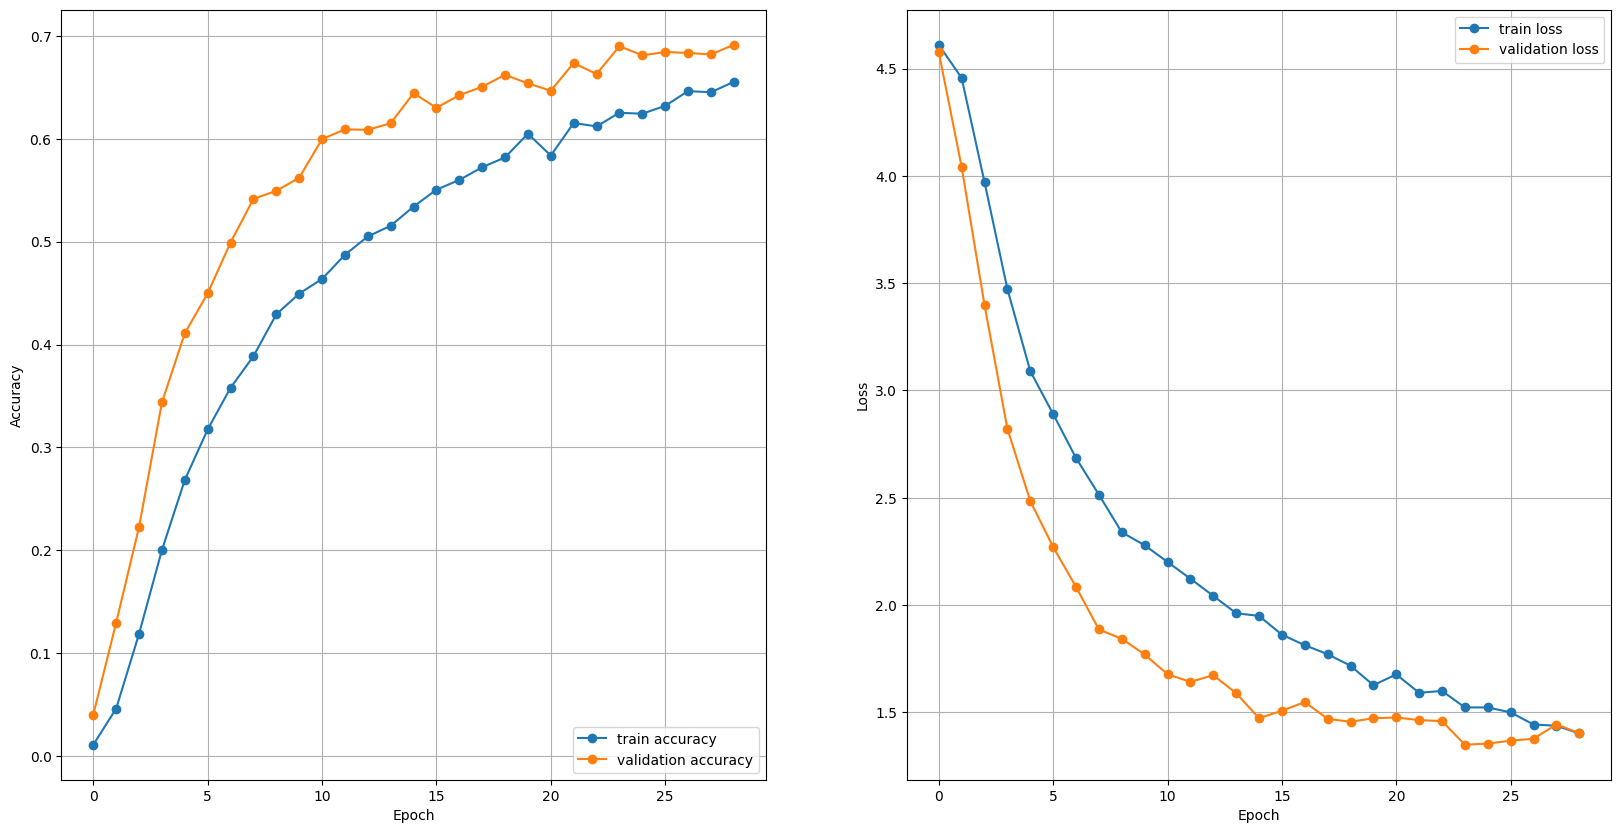

In [10]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')
plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()